## 3.1

In [4]:
import math
from math import sin
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import random
import decimal


def draw_1_scatter (l0, l1, color):
    plt.scatter (l0, l1, c=color)
    plt.show()
    
def draw_2_scatters ( l0, l1, color1, label1, l2, color2, label2):
    p1=plt.scatter (l0, l1, c=color1, s=10) # s: marker size
    p2=plt.scatter (l0, l2, c=color2, s=10)
    
    plt.legend( (p1,p2), (label1, label2), scatterpoints=1, loc='lower left', ncol=1, fontsize=10)
    plt.show()
    
def draw_3_scatters ( l0, l1, color1, label1, l2, color2, label2, l3, color3, label3):
    p1=plt.scatter (l0, l1, c=color1, s=10) # s: marker size
    p2=plt.scatter (l0, l2, c=color2, s=10)
    
    l3_Yis0 = np.zeros (len(l3) )
    p3=plt.scatter (l3, l3_Yis0,  c=color3, s=10, marker="|")
    
    plt.legend( (p1,p2,p3), (label1, label2, label3), scatterpoints=1, loc='lower left', ncol=1, fontsize=10)
    plt.show()
    
def draw_1_line (title, xlabel, ylabel, ymin,ymax, l0, l1, color1, label1  ):

    fig = plt.figure() 
    ax = plt.subplot(111)
    ax.plot(l0, l1, c=color1, label= label1 )
    plt.title(title )
    ax.legend()
    plt.xlabel(xlabel ) 
    plt.ylabel(ylabel )
    ax.set_ylim([ymin,ymax])
#     plt.savefig('D:/Sweden/p3/ANN/lab1/part2/'+ title + '.png', dpi=300)
    plt.show()
    
def draw_2_learning_curve(l1, color1, label1, l2, color2, label2):
    l0 = np.arange(1, np.size(l1)+1, 1)
    p1=plt.scatter (l0, l1, c=color1, s=10) # s: marker size
    p2=plt.scatter (l0, l2, c=color2, s=10)
    plt.title ("learning curve comparison")
    plt.legend( (p1,p2), (label1, label2), scatterpoints=1, loc='upper right', ncol=1, fontsize=10)
#     plt.savefig('D:/Sweden/p3/ANN/lab2/'+ 'learning curve' + '.png', dpi=300)
    plt.show()
    
def generate_target_f1 (inputData):
    f1= [sin (2 * x) for x in inputData   ] 
    return f1

def generate_target_f2 (f1):
    f2=[]
    for i in range (0, len(f1) ):
        if ( f1[i] >= 0 ):
            f2.append (1)
        else:
            f2.append (-1)
    return f2

def generate_x_f1_f2 (x_start, x_end, x_step):
    train_in = np.arange (x_start, x_end, x_step)
    f1 = generate_target_f1(train_in)
    f2= generate_target_f2 (f1)
    f1 = np.array (f1,dtype=float)
    f2 = np.array (f2,dtype=float)
    train_in = np.array(train_in, dtype=float)  # convert from list to array
    return train_in, f1, f2


def draw_learning_curve(error_list):
    x = np.arange(1, np.size(error_list)+1, 1)
    y = error_list
    plt.plot(x, y, 'r--')
    plt.title ("learning curve")
#     plt.savefig('D:/Sweden/p3/ANN/lab2/'+ 'learning curve' + '.png', dpi=300)
    plt.show()
    
def mean_squared_error(prediction, target, data_input):
    constant = 0.5/(len(data_input[0]))
    mse = constant * (prediction - target)**2
    return  mse

def absolute_residual_error(prediction, target, data_input):
    constant = 1/(len(data_input))
    summed_e =0
    for i in range (0, len(data_input)) :
        summed_e += abs(prediction[i] - target[i])
    avg_e = constant * summed_e

    return avg_e


def add_noise (target, noise_std_dev): 
    noise_mean=0
    noise = np.random.normal(noise_mean, noise_std_dev, target.shape)  # np.random.normal(mu, sigma, 1000)
    target_with_noise = target + noise
    return target_with_noise




def RBF(x, mu, var):
    q = -( (x-mu)**2 )/ (2*var)
    return np.exp (q)

def compute_RBF_matrix (mode, train_in, mu, var ): # mode: a string
    
    how_many_RBFunits =len (mu)
    
    if mode == "batch":
        how_many_data_points = len (train_in) # =63
        phi=np.zeros( (how_many_data_points, how_many_RBFunits) )
        for i in range (0, how_many_data_points ):
            for j in range (0, how_many_RBFunits):
                phi[i][j] = RBF(train_in[i], mu[j], var[j])    
                
    elif mode == "seq": #sequential
        phi=np.zeros(how_many_RBFunits)
        for k in range (0, how_many_RBFunits):
            phi[k] = RBF(train_in, mu[k], var[k])        

    return phi


def predict (test_in, w,  mu, var ):
    phi_test = compute_RBF_matrix ("batch", test_in, mu, var)
    prediction = w.dot(phi_test.T)
    return prediction

def RBFlearning_batch_1D (train_in, train_out, test_in, test_out, 
                          label_test_out, num_mu, mu, var, epoch, learning_rate ):
    error_list = []
    w = np.array([1 for i in range (0, len (mu))])
    for i in range(epoch):
        RBF_matrix = compute_RBF_matrix ("batch", train_in, mu, var)
        calculated_target = np.dot(RBF_matrix, w)    
        diff = train_out - calculated_target   
        delta_w = learning_rate * (diff.dot(RBF_matrix)) 
        w = w + delta_w
        
        pred = predict (test_in, w, mu, var ) 
        e = absolute_residual_error(pred, test_out, test_in)    
        error_list.append(e)
        
    draw_learning_curve(error_list)
    draw_2_scatters (test_in, test_out, 'r', label_test_out, pred, 'b', 'prediction')
    print ("batch mode. error:", error_list[-1])
    
    return pred, error_list




def RBFlearning_seq_1D (train_in, train_out, test_in, test_out, 
                        label_test_out, num_mu, mu, var, epoch, learning_rate ):
    error_list=[]
    w = np.array([1 for i in range (0, len (mu))]) 
    for ep in range(0, epoch): 
        for i in range(len(train_in)):
            oneDataPoint = train_in[i]
            RBF_matrix = compute_RBF_matrix ("seq", oneDataPoint, mu, var)                 
            calculated_target = np.dot(RBF_matrix.T, w)   
            diff = train_out[i] - calculated_target
            delta_w = learning_rate * (diff * (RBF_matrix.T)) 
            w = w + delta_w

        pred = predict (test_in, w, mu, var ) 
        e = absolute_residual_error(pred, test_out, test_in) 
        error_list.append(e)
        
#     draw_learning_curve(error_list)
    draw_2_scatters (test_in,   test_out, 'r', label_test_out,  pred, 'b', 'prediction')
#     draw_3_scatters ( test_in,   test_out, 'r', label_test_out,  pred, 'b', 'prediction', mu, 'g', 'mean of an RBF')
    print ("sequential mode. error:", error_list[-1])
    
    return pred, error_list



def competitive_learning ( nb_rbf_to_update, mu, train_in, train_out, win_percentage,lose_percentage): # mu is a list of RBF centers
    iterations=500
    for i in range (iterations):
        random_point_index = random.randrange(len(train_in))
        chosen_point = train_in[random_point_index]

        distance=np.zeros(len(mu)) 
        for j in range(0, len(mu)):
            measure = mu[j] - chosen_point
            distance[j] = abs(measure)            
        index_winning = np.argmin(distance)
        mu_update = learning_rate * (chosen_point - mu[index_winning])  #rbf position update 
        mu[index_winning] += win_percentage * mu_update                 #rbf position update 

        #avoid dead units- all RBFs get updated 
        if nb_rbf_to_update == "update all RBF" :
            for l in range(0, len(mu)):
                if l != index_winning:
                    mu_update_lose = learning_rate * (chosen_point - mu[l])
                    mu[l] += lose_percentage * mu_update_lose
                
        
    return mu

def initialize_RBF_mu (method, train_in, num_mu):
    mu=[]
    nb_data = len (train_in)
    if (method== "byhand" ): # place the mean of RBF by hand
        mu_step = (2*pi) / num_mu
        mu = np.arange (0, 2*pi, mu_step)          
        
    elif (method== "random" ): # place the mean of RBF on random positions
        for i in range(nb_rbf):
            mu.append (float (decimal.Decimal(random.randrange(0, 60))/10))  # min:0/10=0  max: 60/10=6  including decimal number
    
    elif (method== "ondata" ): # place the mean of RBF on randomly selected data points
        for i in range(nb_rbf):
            ind = random.randrange(0, nb_data,1)
            mu.append( train_in[ind])
    else:
        print ("give a valid method to initialize RBF's mean ")
    return mu

def seq_withoutCL ( train_in, train_f1, test_in, test_f1, testDataLabel, 
                   nb_rbf, mu, var, epoch, learning_rate):

    pred, error = RBFlearning_seq_1D (train_in, train_f1, test_in, test_f1, 
                                       testDataLabel, nb_rbf, mu, var, epoch, learning_rate )
    print ("mu:", mu)
    return 


def seq_withCL (nb_rbf_to_update, train_in, train_f1, test_in, test_f1, testDataLabel, 
                nb_rbf, mu, var, epoch, learning_rate):
    
    print ("mu:", mu)
    mu_cl = competitive_learning (nb_rbf_to_update, mu, train_in, train_f1, win_percentage,lose_percentage)
    pred, error = RBFlearning_seq_1D (train_in, train_f1, test_in, test_f1, testDataLabel, nb_rbf, mu_cl, var, epoch, learning_rate )
    
    
    print ("mu_cl:", mu_cl)
    
    return 


    
train_in, train_f1, train_f2 = generate_x_f1_f2 (0, 2*pi, 0.1)
test_in, test_f1, test_f2  = generate_x_f1_f2 (0.05, 2*pi, 0.1)

noise_var= 0.1
noise_std_dev = math.sqrt(noise_var) 
train_f1_noisy = add_noise (train_f1, noise_std_dev)
test_f1_noisy = add_noise (test_f1, noise_std_dev)


## 3.2

Not using competitive learning


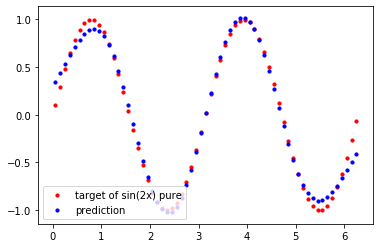

sequential mode. error: 0.05554969978030755
mu: [0.         0.48332195 0.96664389 1.44996584 1.93328779 2.41660973
 2.89993168 3.38325363 3.86657557 4.34989752 4.83321947 5.31654141
 5.79986336]
Using competitive learning
mu: [0.         0.48332195 0.96664389 1.44996584 1.93328779 2.41660973
 2.89993168 3.38325363 3.86657557 4.34989752 4.83321947 5.31654141
 5.79986336]


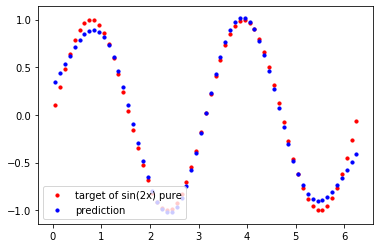

sequential mode. error: 0.05614381993058086
mu_cl: [0.00977036 0.49030883 0.97641191 1.45510205 1.9265601  2.41314701
 2.89329072 3.38567668 3.86449631 4.35042991 4.83439957 5.31206088
 5.83008982]


In [5]:


learning_rate = 0.01
epoch = 100 
nb_rbf = 13      
var = [0.4 for i in range (0, nb_rbf)] 
place_initial_rbf = "byhand" #"random" #"byhand" #"ondata"
mu= initialize_RBF_mu (place_initial_rbf, train_in, nb_rbf)
win_percentage = 0.7
lose_percentage = (1- win_percentage) / (len(mu)-1 )


print ("Not using competitive learning")
e_pure_withoutCL = seq_withoutCL ( train_in, train_f1,       test_in,    test_f1,      "target of sin(2x) pure", 
               nb_rbf, mu, var, epoch, learning_rate)

print ("Using competitive learning")
e_pure_withCL = seq_withCL ( "update 1 RBF", train_in, train_f1,       test_in,    test_f1,      "target of sin(2x) pure", 
               nb_rbf, mu, var, epoch, learning_rate)



# seq_withCL ( "byhand", "update all RBF",train_in, train_f1,       test_in,    test_f1,      "target of sin(2x) pure", 
#                nb_rbf, mu, var, epoch, learning_rate)

# e_noisy_withoutCL = seq_withoutCL ( "byhand", train_in, train_f1_noisy, test_in, test_f1_noisy, "sin(2x) noisy", 
#                nb_rbf, mu, var, epoch, learning_rate)
# e_noisy_withCL = seq_withCL ( "byhand", "update 1 RBF", train_in, train_f1_noisy, test_in, test_f1_noisy, "sin(2x) noisy", 
#                nb_rbf, mu, var, epoch, learning_rate)



In [6]:
draw_2_learning_curve(e_pure_withCL, 'c', "error on sin(2x) pure", e_noisy_withCL, 'm', "error on sin(2x) noisy")


NameError: name 'e_noisy_withCL' is not defined

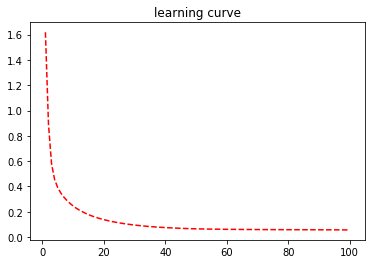

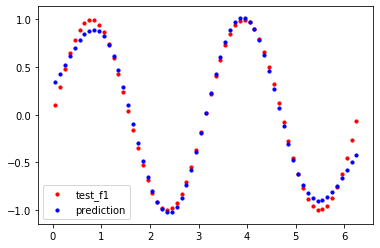

batch mode. error: 0.056265388448082564


In [7]:
learning_rate = 0.01
epoch = 100 
nb_rbf = 13
var = [0.4 for i in range (0, nb_rbf)] 


mu= initialize_RBF_mu ("byhand", train_in, nb_rbf)
pred, error = RBFlearning_batch_1D (train_in, train_f1, test_in, test_f1, 
                                            "test_f1", nb_rbf, mu, var, epoch, learning_rate )

